Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет (ключевая переменная) (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
Определить наиболее значимые переменные которые влияют на выживаемость. 
Визуализировать дерево решений. 
Написать вывод. 
Не копировать бездумно чужие работы. 


Ответить на вопросы (обоснованно).

1. Как влияет размер семьи  на вероятность виживаемости (одинокие выживают чаще или нет?, люди у которых большая семья (больше 4) выживают чаще или нет).
2. Как влияет пол/возраст/номер палубы. 

 

V2
15.01.24
Anatoly

In [768]:
import numpy as np
import pandas as pd
import spacy 

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
nlp = spacy.load("ru_core_news_sm") 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

file_path_test ="C:/Users/qiarr/Desktop/task/lesson 18/titanic_test.csv"
file_path_train = "C:/Users/qiarr/Desktop/task/lesson 18/titanic_train.csv"
df_test = pd.read_csv(file_path_test, encoding='cp1251', )
df_train = pd.read_csv(file_path_train, encoding='cp1251',)


In [769]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [770]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [771]:


# метод drop для удаления указанных столбцов
df_train_cleaned = df_train.drop(['Cabin', 'Embarked',"PassengerId","Name","Ticket"], axis=1)
df_train_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [772]:
for i in df_train_cleaned.columns:
    unic = df_train_cleaned[i].unique()
    print(f"Столбец {i}: {unic}")

Столбец Survived: [0 1]
Столбец Pclass: [3 1 2]
Столбец Sex: ['male' 'female']
Столбец Age: [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Столбец SibSp: [1 0 3 4 2 5 8]
Столбец Parch: [0 1 2 5 3 4 6]
Столбец Fare: [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   

In [773]:
nan_finder = df_train_cleaned["Fare"].isna().any()
print(f"В столбце 'ВашСтолбец' есть NaN: {nan_finder}")
# Данных много и невсем понятно есть ли данные с nan в цене билета

В столбце 'ВашСтолбец' есть NaN: False


Исходя из наблюдений мы видм что в двтасете есть данные NAN в AGE ,которые не очень хотелось бы терять,подставим медиану вместо них

In [774]:
median = df_train_cleaned["Age"].median()
df_train_cleaned["Age"] = df_train_cleaned["Age"].fillna(median)
print(df_train_cleaned["Age"].unique()) 

[22.   38.   26.   35.   28.   54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.    8.   19.   40.   66.   42.   21.   18.
  3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.   16.
 25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.   14.5
 70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.   56.
 50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.   60.
 10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.    0.67
 30.5   0.42 34.5  74.  ]


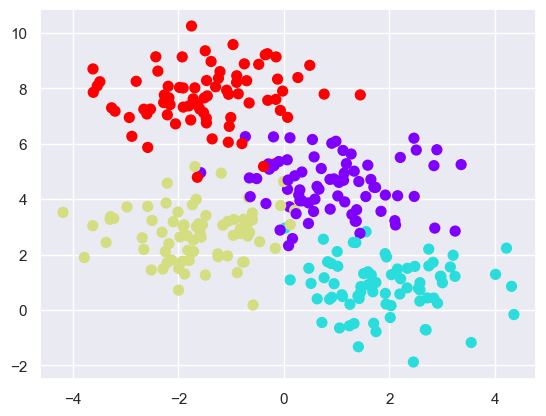

In [775]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [776]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    plt.show()
    


C:\Users\qiarr\AppData\Local\Temp\ipykernel_3432\2533355814.py:22: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


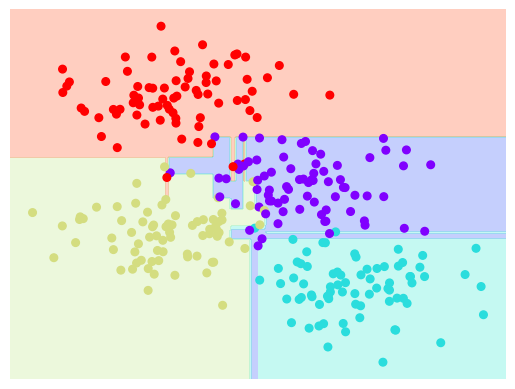

In [777]:
visualize_classifier(DecisionTreeClassifier(max_depth=10), X, y)

In [778]:
from sklearn.ensemble import RandomForestClassifier

#data["Age"] = data["Age"].astype(int)
#if ["Age"]

y = df_train_cleaned["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(df_train_cleaned[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=2)
model.fit(X, y)
predictions = model.predict(X_test)

print(pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions}))


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


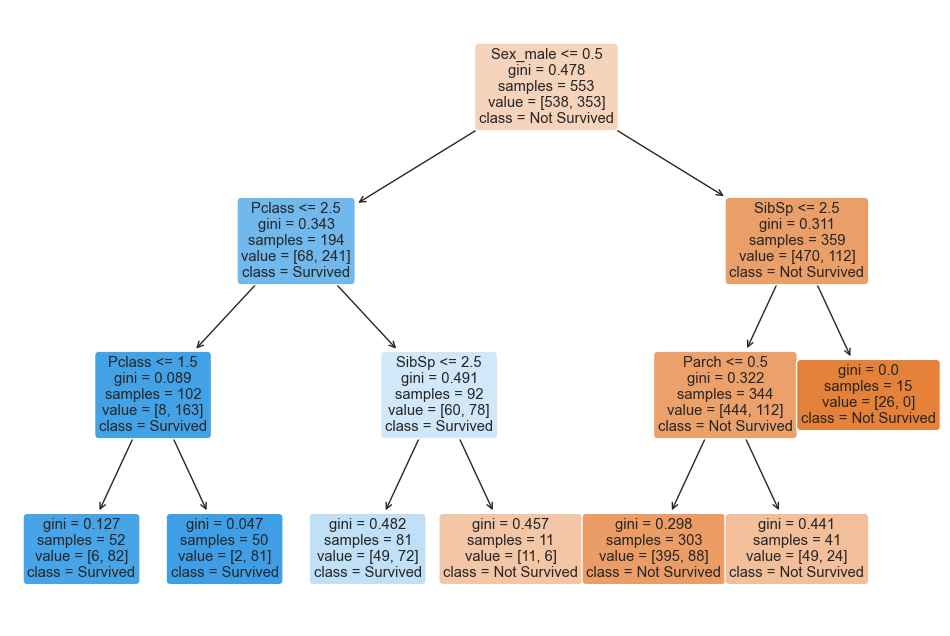

In [779]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Получение первого дерева из леса
tree = model.estimators_[0]

# Визуализация дерева
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

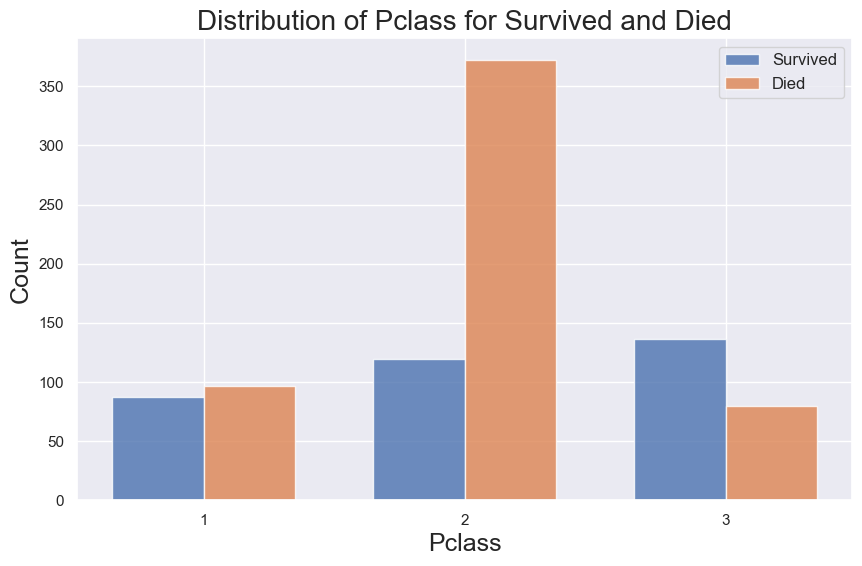

In [780]:
plt.figure(figsize=(10, 6))

# Уникальные значения классов
class_values = df_train['Pclass'].unique()

# Количество выживших и погибших для каждого класса
survived_counts = df_train[df_train['Survived'] == 1]['Pclass'].value_counts().sort_index()
died_counts = df_train[df_train['Survived'] == 0]['Pclass'].value_counts().sort_index()

# Ширина баров
bar_width = 0.35

# Построение баров для выживших
plt.bar(class_values - bar_width/2, survived_counts, bar_width, label='Survived', alpha=0.8)
# Построение баров для погибших
plt.bar(class_values + bar_width/2, died_counts, bar_width, label='Died', alpha=0.8)

plt.xlabel('Pclass', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of Pclass for Survived and Died', fontsize=20)
plt.legend(fontsize=12)
plt.xticks(class_values)
plt.show()

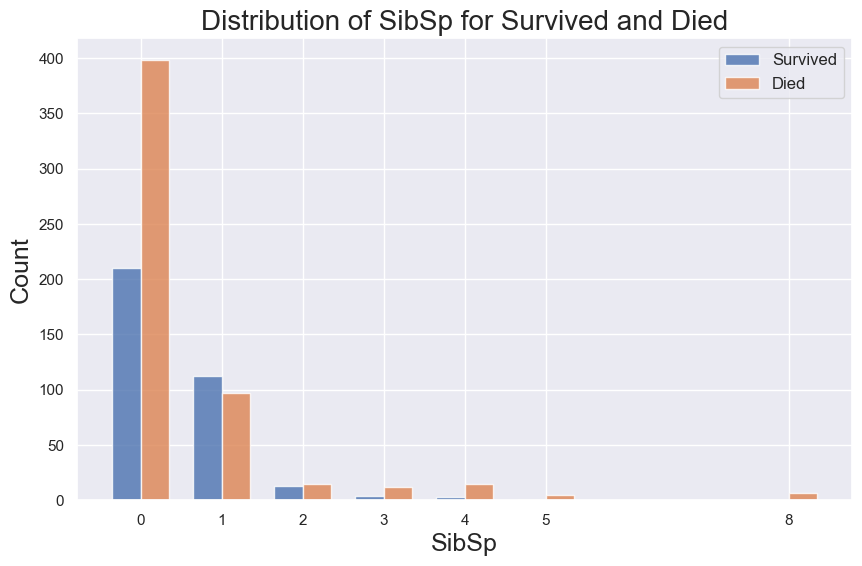

In [781]:

plt.figure(figsize=(10, 6))

# Уникальные значения SibSp
sibsp_values = df_train['SibSp'].unique()

# Количество выживших и погибших для каждого значения SibSp
survived_counts = df_train[df_train['Survived'] == 1]['SibSp'].value_counts().sort_index()
died_counts = df_train[df_train['Survived'] == 0]['SibSp'].value_counts().sort_index()

# Ширина баров
bar_width = 0.35

# Построение баров для выживших
plt.bar(sibsp_values - bar_width/2, survived_counts.reindex(sibsp_values, fill_value=0), bar_width, label='Survived', alpha=0.8)

# Построение баров для погибших
plt.bar(sibsp_values + bar_width/2, died_counts.reindex(sibsp_values, fill_value=0), bar_width, label='Died', alpha=0.8)

plt.xlabel('SibSp', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of SibSp for Survived and Died', fontsize=20)
plt.legend(fontsize=12)
plt.xticks(sibsp_values)
plt.show()

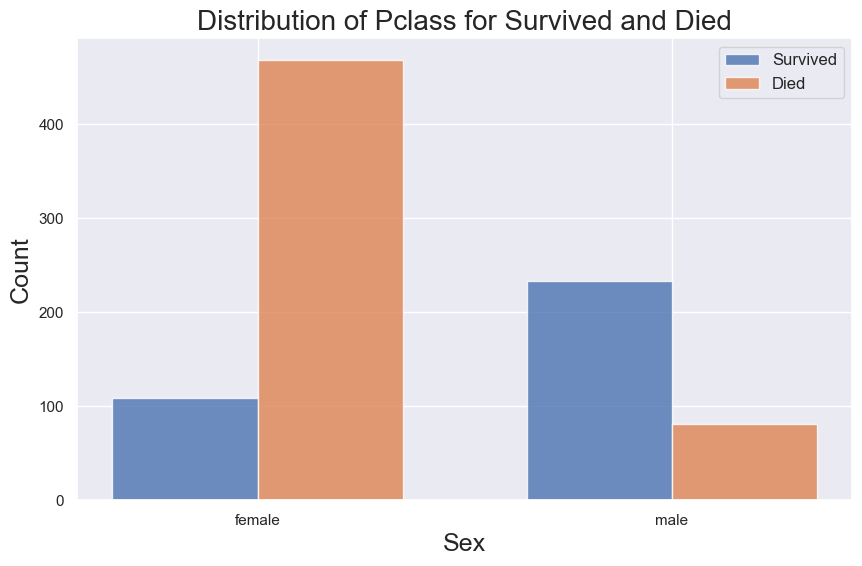

In [782]:
plt.figure(figsize=(10, 6))
df_plot = df_train.copy()
# Замена 'male' на 1 и 'female' на 0
df_plot['Sex'] = df_plot['Sex'].replace({'male': 1, 'female': 0})
# Уникальные значения классов
class_values = df_plot['Sex'].unique()


# Количество выживших и погибших для каждого класса
survived_counts = df_plot[df_plot['Survived'] == 1]['Sex'].value_counts().sort_index()
died_counts = df_plot[df_plot['Survived'] == 0]['Sex'].value_counts().sort_index()

# Ширина баров
bar_width = 0.35

# Построение баров для выживших
plt.bar(class_values - bar_width/2, survived_counts, bar_width, label='Survived', alpha=0.8)
# Построение баров для погибших
plt.bar(class_values + bar_width/2, died_counts, bar_width, label='Died', alpha=0.8)

plt.xlabel('Sex', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Distribution of Pclass for Survived and Died', fontsize=20)
plt.legend(fontsize=12)
plt.xticks(class_values, ['male', 'female'])
plt.show()

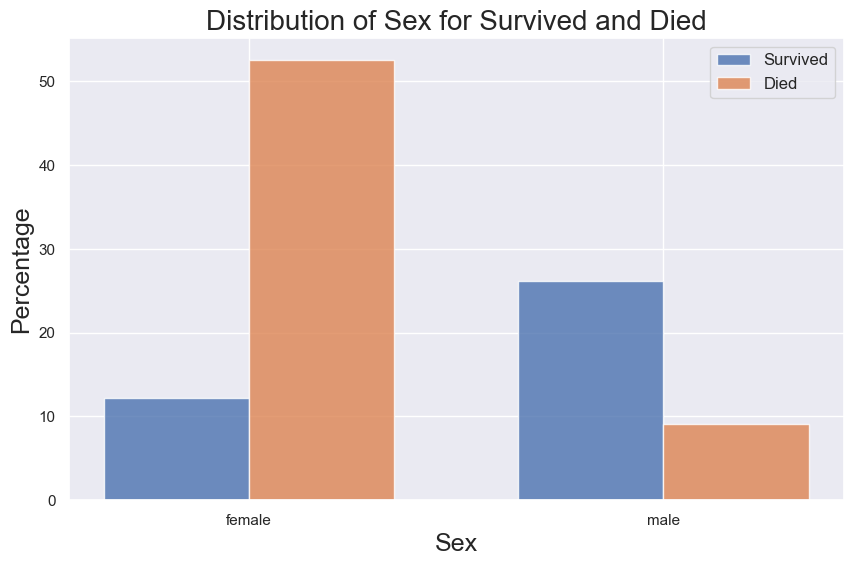

In [783]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df_plot = df_train.copy()

# Замена 'male' на 1 и 'female' на 0
df_plot['Sex'] = df_plot['Sex'].replace({'male': 1, 'female': 0})

# Уникальные значения классов
class_values = df_plot['Sex'].unique()

# Количество выживших и погибших для каждого класса
survived_counts = df_plot[df_plot['Survived'] == 1]['Sex'].value_counts().sort_index()
died_counts = df_plot[df_plot['Survived'] == 0]['Sex'].value_counts().sort_index()

# Общее количество людей в выборке
total_people = len(df_plot)

# Ширина баров
bar_width = 0.35

# Построение баров для выживших
plt.bar(class_values - bar_width/2, survived_counts / total_people * 100, bar_width, label='Survived', alpha=0.8)
# Построение баров для погибших
plt.bar(class_values + bar_width/2, died_counts / total_people * 100, bar_width, label='Died', alpha=0.8)

plt.xlabel('Sex', fontsize=18)
plt.ylabel('Percentage', fontsize=18)
plt.title('Distribution of Sex for Survived and Died', fontsize=20)
plt.legend(fontsize=12)
plt.xticks(class_values, ['male', 'female'])
plt.show()

из двух графиков по процентному соотношению и количеству людей видно что женщин спаслось гораздо меньше несмотря на то что их болы более чем в два раза больше чем мужчин

C:\Users\qiarr\AppData\Local\Temp\ipykernel_3432\1544969759.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df_train.groupby('Age_Group')['Survived'].mean().reset_index()
C:\Users\qiarr\AppData\Local\Temp\ipykernel_3432\1544969759.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age_Group', y='Survived', data=age_group_survival, palette='viridis')


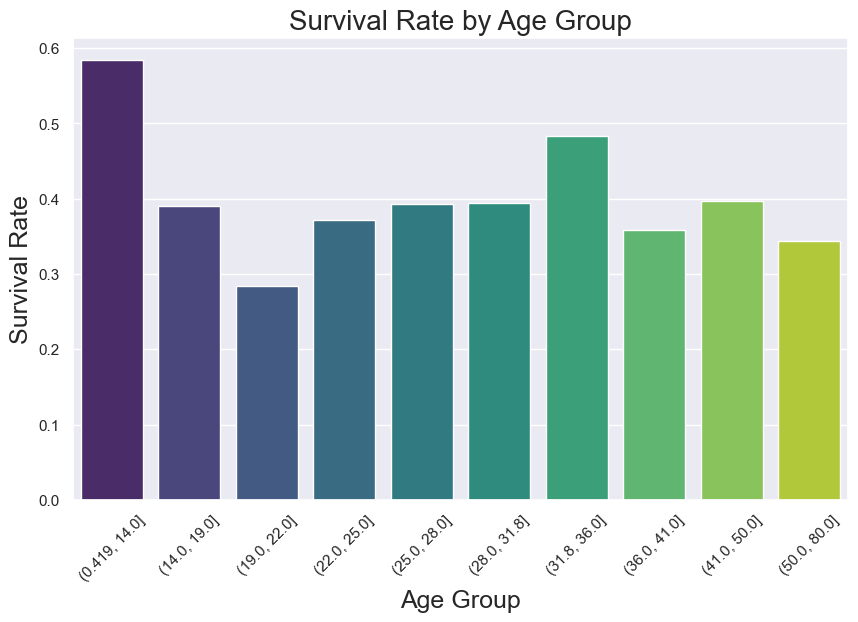

In [784]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создание нового столбца с группами возрастов с использованием qcut
df_train['Age_Group'] = pd.qcut(df_train['Age'], q=10)

# Используйте groupby для группировки по возрастным группам и вычисления средней выживаемости
age_group_survival = df_train.groupby('Age_Group')['Survived'].mean().reset_index()

# Используйте seaborn или matplotlib для построения графика
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Survived', data=age_group_survival, palette='viridis')
plt.xlabel('Age Group', fontsize=18)
plt.ylabel('Survival Rate', fontsize=18)
plt.title('Survival Rate by Age Group', fontsize=20)
plt.xticks(rotation=45)
plt.show()

C:\Users\qiarr\AppData\Local\Temp\ipykernel_3432\3086195528.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'


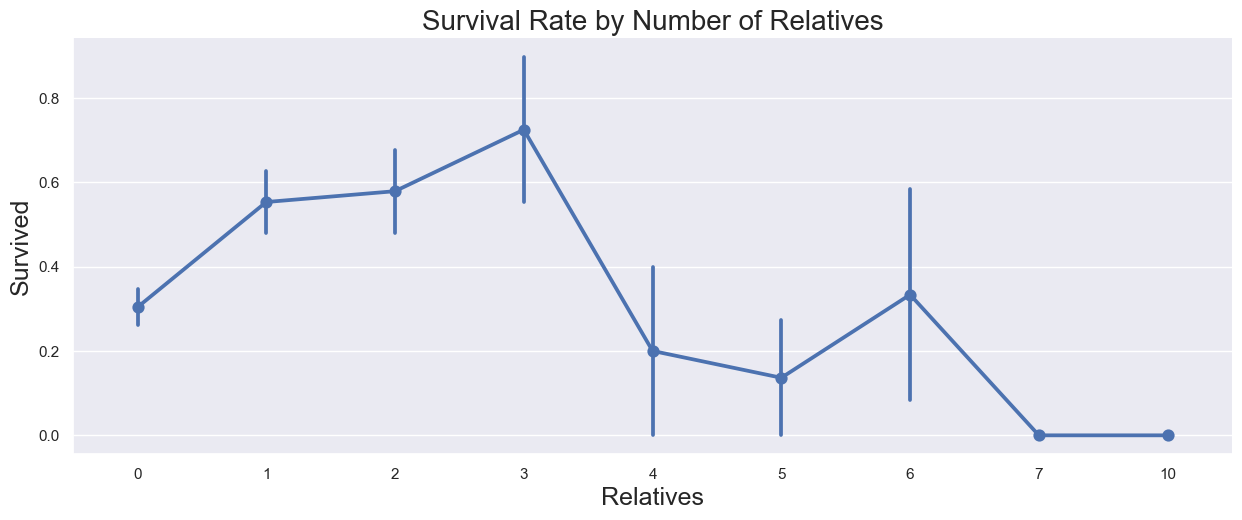

In [785]:
import seaborn as sns
import matplotlib.pyplot as plt

data = [df_train]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'

# Use catplot instead of factorplot
axes = sns.catplot(x='relatives', y='Survived', data=df_train, aspect=2.5, kind='point')

# Add labels and title
plt.xlabel('Relatives', fontsize=18)
plt.ylabel('Survived', fontsize=18)
plt.title('Survival Rate by Number of Relatives', fontsize=20)

plt.show()